<center>

# **CO-OCCURRENCE MATRIX**

</center>

In [ ]:
pip install nltk scikit-learn


In [ ]:
import pandas as pd
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy.sparse import csr_matrix, csc_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the data columns types
dtypes = {
    "tweet_id": "object",
    "tweet_text":"str",
    "tweet_possibly_sensitive": "bool",
    "tweet_text": "str",
    "tweet_source": "object",
    "tweet_lang": "str",
    "tweet_retweet_count": "object",
    "tweet_reply_count":"object",
    "tweet_like_count": "object",
    "tweet_quote_count": "object",
    "tweet_impression_count": "object",
    "user_id":"object",
    "user_username": "object",
    "user_verified":"object",
    "user_protected":"object",
    "user_description":"str",
    "user_profile_image_url":"float",
    "user_location":"float",
    "user_followers_count":"float",
    "user_friends_count":"float",
    "user_tweet_count":"float",
    "place_id":"object",
    "place_name": "object",
    "place_full_name":"object",
    "place_country":"object",
    "place_country_code":"object",
    "place_type":"object",
    "clean_text":"str"
}

## Separate periods

Se can upload the separate files to create the histograms for each period.

In [ ]:
#Set path for files
files_path        = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Data/'

In [ ]:
wildfire_name = 'Tubbs'
output_name1  = '2.TubbsFire_wildfire_words.csv'

In [ ]:
# Load the CSV file into a Pandas DataFrame
df1 = pd.read_csv(os.path.join(files_path, output_name1),dtype=dtypes)
print(df1.shape)


(90759, 29)


In [ ]:
# Define a tokenizer function to split text into individual words while excluding numbers and words with repeating characters
def tokenizer(text):
    return [word for word in re.findall(r'\b[^\d\W]+\b', text) if not re.search(r'(\w)\1', word)]

# Preprocess the corpus
corpus = df1['clean_text'].apply(lambda x: ' '.join(tokenizer(x.lower())))



In [ ]:
# Initialize the CountVectorizer with the custom tokenizer
vectorizer = CountVectorizer(tokenizer=tokenizer, lowercase=False)

# Fit and transform the preprocessed text
matrix = vectorizer.fit_transform(corpus)

# Get the vocabulary (words)
vocabulary = vectorizer.get_feature_names_out()

# Compute the co-occurrence matrix
co_occurrence_matrix = matrix.T.dot(matrix)
co_occurrence_matrix.setdiag(0)  # Set diagonal values to zero since they represent single word occurrences

# Find the row and column indices where values are greater than 200
row_indices, col_indices = np.argwhere(co_occurrence_matrix > 2000).T

# Create a list of word combinations with frequency over 200
word_combinations = [(vocabulary[row_idx], vocabulary[col_idx], co_occurrence_matrix[row_idx, col_idx])
                     for row_idx, col_idx in zip(row_indices, col_indices)]

# Convert the list of word combinations to a DataFrame
filtered_df = pd.DataFrame(word_combinations, columns=['Word 1', 'Word 2', 'Frequency'])

# Print the filtered DataFrame
print(filtered_df)




In [ ]:
# Find the maximum value in each column
max_values = np.max(filtered_df, axis=0)

In [ ]:
# Save the co-occurrence matrix as an Excel file
filtered_df.to_excel('/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Data/6.Co_occurrence_matrix.xlsx', index=True)

## **Second approach:**

In this part of the code I upload a list of words found in the most frequent words related with mental health. I want to see which are the most co-occurrence words in the text.

In [ ]:
file_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Data/Tubbs_MH_Words.txt'

In [ ]:
# Define a tokenizer function to split text into individual words while excluding numbers and words with repeating characters
def tokenizer(text):
    return [word for word in re.findall(r'\b[^\d\W]+\b', text) if not re.search(r'(\w)\1', word)]

# Preprocess the corpus
corpus = df1['clean_text'].apply(lambda x: ' '.join(tokenizer(x.lower())))

In [ ]:
# Open the file
with open(file_path, "r") as file:
    # Read the content of the file and split into a list of words
    word_list = file.read().splitlines()


In [ ]:
# Initialize the CountVectorizer with the custom tokenizer
vectorizer = CountVectorizer(tokenizer=tokenizer, lowercase=False)

# Fit and transform the preprocessed text
matrix = vectorizer.fit_transform(corpus)

# Get the vocabulary (words)
vocabulary = vectorizer.get_feature_names_out()

# Compute the co-occurrence matrix
co_occurrence_matrix = matrix.T.dot(matrix)
co_occurrence_matrix.setdiag(0)  # Set diagonal values to zero since they represent single word occurrences

# Find the row and column indices where values are greater than 200
row_indices, col_indices = np.argwhere(co_occurrence_matrix > 150).T

# Create a list of word combinations with frequency over 200
word_combinations = [(vocabulary[row_idx], vocabulary[col_idx], co_occurrence_matrix[row_idx, col_idx])
                     for row_idx, col_idx in zip(row_indices, col_indices)]

# Convert the list of word combinations to a DataFrame
filtered_df = pd.DataFrame(word_combinations, columns=['Word 1', 'Word 2', 'Frequency'])

# Print the filtered DataFrame
print(filtered_df)


In [ ]:
reduced_df = filtered_df[(filtered_df['Word 1'].isin(word_list))]

unique_words = reduced_df['Word 2'].unique()
print(unique_words)

In [ ]:
#fire_list=['fire', 'wildfire', 'airquality', 'smoke','burning', 'fires','wildfires']
fire_list  = ['tubbsfire','wildfire','smoke','napa','santa','lake','rosa','sonoma','smokey','california','wine','napafire','santarosafire','airquality','smokeintheair','smokeyair','fire','californiafires','napa','fires','sonomafire','smog','sonomastrong','airquality','smokeintheair','smokeyair','fire','californiafires','fires','smog','firestorm','northbayfires','calfire','norcalfires','bushfire','forestfire','grassfire','burning','firestorm', 'wildfires','smoke']
reduced_df = filtered_df[(filtered_df['Word 1'].isin(word_list))&(filtered_df['Word 2'].isin(word_list)|filtered_df['Word 2'].isin(fire_list))]


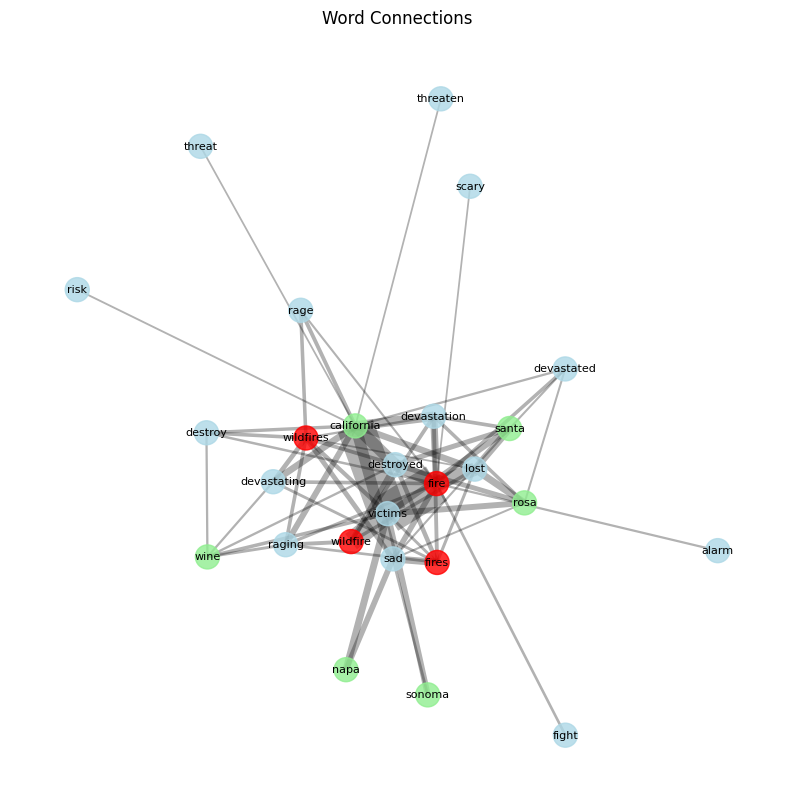

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

max_freq = reduced_df['Frequency'].max()

# Create an empty graph
graph = nx.Graph()

# Add edges to the graph based on the connections in your DataFrame
for index, row in reduced_df.iterrows():
    word1 = row['Word 1']
    word2 = row['Word 2']
    frequency = row['Frequency']
    graph.add_edge(word1, word2, weight=frequency)

# Set the positions of the nodes using the Fruchterman-Reingold layout algorithm
pos = nx.spring_layout(graph, k=0.7, iterations=100, seed=52)

# Set the figure size to provide more space for the nodes
plt.figure(figsize=(10, 10))

# Draw the nodes, edges, and labels
node_colors = ['red' if node in ['fire', 'wildfire', 'airquality','smoke', 'burning', 'fires', 'wildfires'] else 'lightblue' if node in reduced_df['Word 1'].values else 'lightgreen' for node in graph.nodes()]
edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]
edge_widths = [0.008*weight for weight in edge_weights]  # Adjust the scaling factor as needed

nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=300, alpha=0.8)
nx.draw_networkx_edges(graph, pos, width=edge_widths, alpha=0.3)  # Use edge widths based on frequency
nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')

##save figures
#figure_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/'
#figure_name = 'Co-occurrence_Tubbs'


# Save the figure as a PDF
#output_file = os.path.join(figure_path,figure_name)
#plt.savefig(output_file,format='pdf')


# Set the plot title and display the graph
plt.title('Word Connections')
plt.axis('off')
plt.show()



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt  # Import matplotlib.pyplot once
import networkx as nx

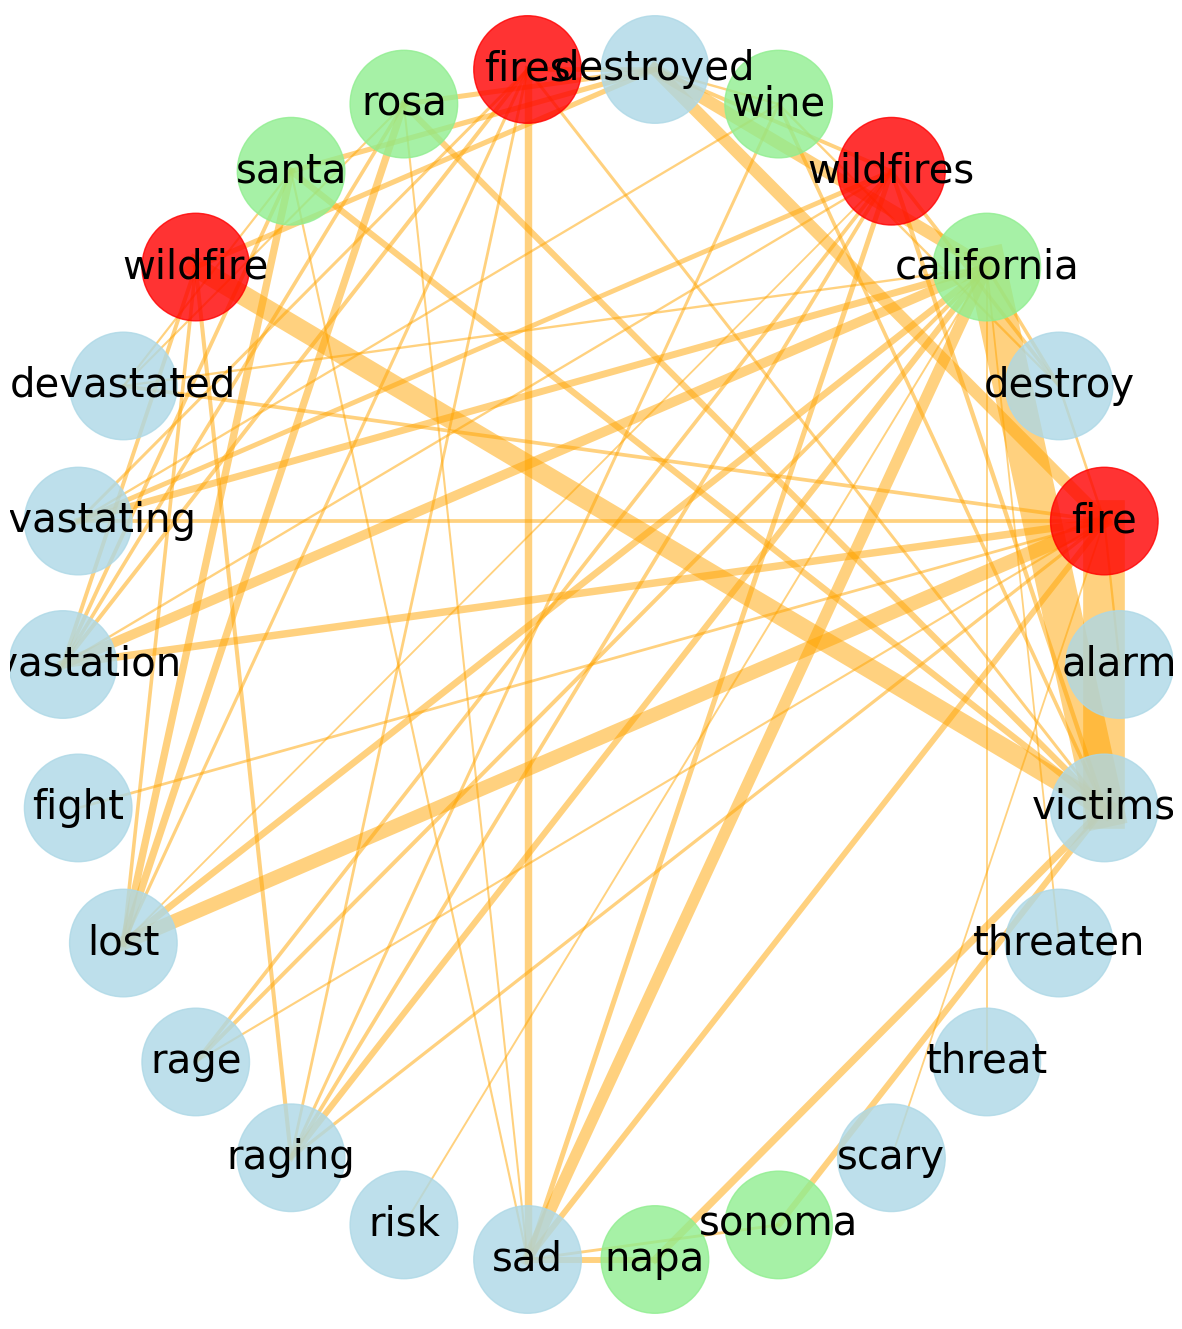

In [ ]:
fig, ax = plt.subplots(figsize=(15, 17))

# Calculate the maximum frequency for normalizing edge weights
max_frequency = reduced_df['Frequency'].max()

# Calculate the total number of nodes in the graph
num_nodes = graph.number_of_nodes()

# Calculate positions of nodes evenly along the circumference of a circle
circle_positions = {
    node: (
        0.5 + 0.5 * math.cos(2 * math.pi * i / num_nodes),
        0.5 + 0.5 * math.sin(2 * math.pi * i / num_nodes)
    )
    for i, node in enumerate(graph.nodes())
}

#Draw edges as diagonals connecting the nodes
for edge in graph.edges():
    node1, node2 = edge
    pos1, pos2 = circle_positions[node1], circle_positions[node2]
    frequency = graph[node1][node2]['weight']
    normalized_weight = frequency / max_frequency
    line = plt.Line2D((pos1[0], pos2[0]), (pos1[1], pos2[1]), color='orange', alpha=0.5, linewidth=30*normalized_weight)
    ax.add_line(line)

# Draw nodes and labels
nx.draw_networkx_nodes(graph, circle_positions, node_color=node_colors, node_size=6000, alpha=0.8)
nx.draw_networkx_labels(graph, circle_positions, font_size=29, font_color='black')

# Set plot title, axis off, and save the figure
plt.title('')
plt.axis('off')
output_file = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/Co-occurrence_Tubbs_polygon.png'
plt.savefig(output_file, format='png')
plt.show()
